In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker

import sys
sys.path.append('..')
sys.path.append('../../../code')
from lib import *
plt.style.use('../../../code/peptidome.mplstyle')
from lib.plotting import model_labels as labels
import pyrepseq.plotting as prsp

datadir = '../../../code/maxent/data'
figdatadir = './'

In [8]:
k = 9

sample_matrices = {}
sample_matrices['virus_model'] =  load_matrix(f'{datadir}/Humanviruses_nskewfcov_k9_matrix.csv.gz')
sample_matrices['virus_data'] =  load_matrix(f'{datadir}/Humanviruses_train_k9_matrix.csv.gz')
sample_matrices['malaria_model'] = load_matrix(f'{datadir}/Malaria_nskewfcov_k9_matrix.csv.gz')
sample_matrices['malaria_data'] = load_matrix(f'{datadir}/Malaria_train_k9_matrix.csv.gz')

In [9]:
sample_matrices['uniform'] =  np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k))

In [3]:
reference = set(count_kmers_proteome(human, k, clean=True))

In [4]:
def mat_to_dist(A, size=100000):
    sample = matrix_to_kmers(A[np.random.choice(A.shape[0], size=size, replace=False), :])
    ns = nndist_hamming_distribution(sample, reference)
    return ns

In [10]:
ns_dict = {}
for model in sample_matrices:
    print(model)
    ns_dict[model] = mat_to_dist(sample_matrices[model])
    print(np.sum(ns_dict[model]), ns_dict[model])

virus_model
100000 [   80  2606 46930 50384]
virus_data
100000 [  181  2883 47580 49356]
malaria_model
100000 [   77  1655 37718 60550]
malaria_data
100000 [  368  2378 38170 59084]
uniform
100000 [    1   352 18957 80690]


In [34]:
ps_dict = {key: value/np.sum(value) for key, value in ns_dict.items()}
ps_dict['uniform'][0] = len(reference)/20**k

In [35]:
ps_dict

{'virus_model': array([0.0008 , 0.02606, 0.4693 , 0.50384]),
 'virus_data': array([0.00181, 0.02883, 0.4758 , 0.49356]),
 'malaria_model': array([0.00077, 0.01655, 0.37718, 0.6055 ]),
 'malaria_data': array([0.00368, 0.02378, 0.3817 , 0.59084]),
 'uniform': array([2.03306406e-05, 3.52000000e-03, 1.89570000e-01, 8.06900000e-01])}

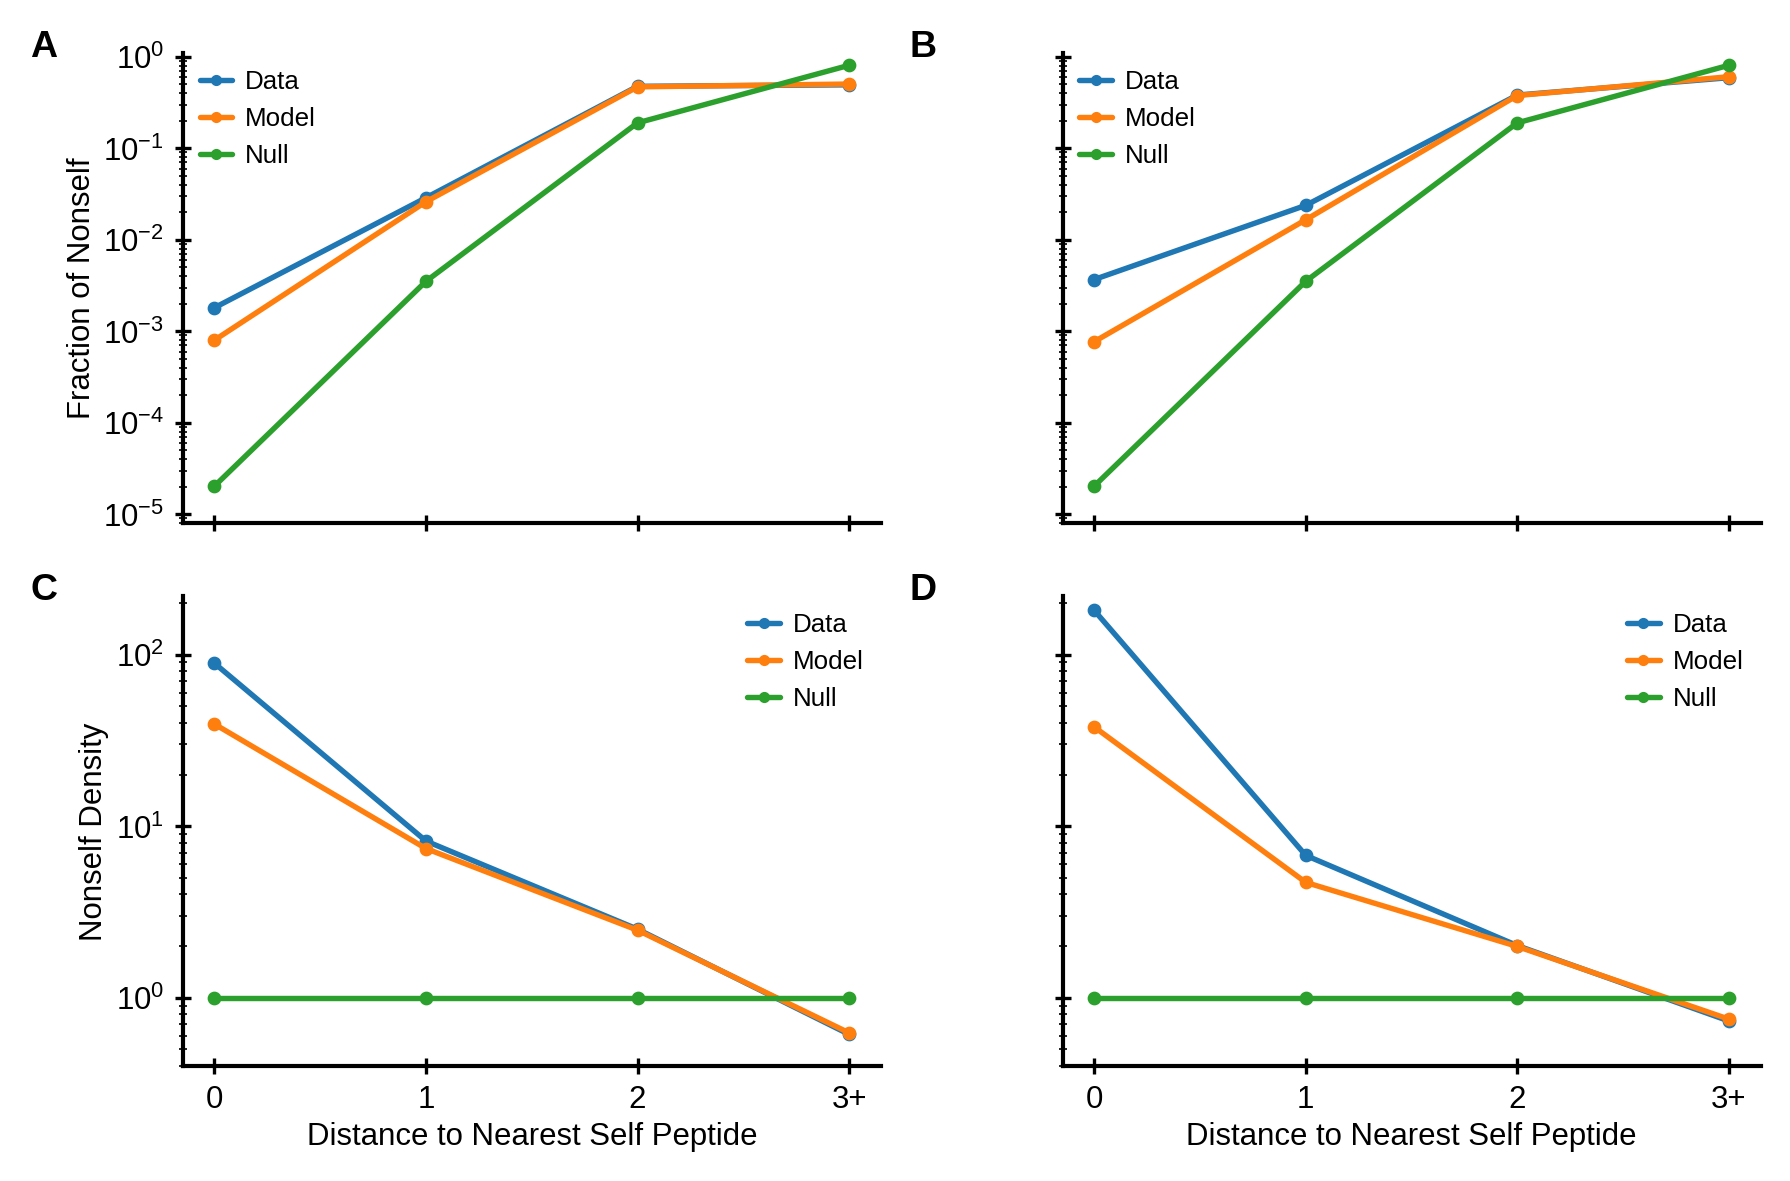

In [83]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'virus_model': 'Model',
    'virus_data': 'Data',
    'malaria_model': 'Model',
    'malaria_data': 'Data',
    'uniform': 'Null'
    
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['virus_data', 'virus_model', 'uniform']:
    ps = ps_dict[model]
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['malaria_data', 'malaria_model', 'uniform']:
    ps = ps_dict[model]
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
plt.savefig('../fig3_not_annotated.png')
plt.savefig('../fig3_not_annotated.svg')